## Descriptive Analysis

In [99]:
import pandas as pd

In [100]:
df = pd.read_csv('./sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [101]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [102]:
numcol = df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
numcol

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [103]:
numcol.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [104]:
import numpy as np
from scipy import stats

In [105]:
descriptive = []
for i in numcol.columns:
    descriptive.append({
        'mean' : round(np.mean(numcol[i]), 2),
        'median' : round(np.median(numcol[i]), 2),
        'mode' : round(stats.mode(numcol[i]).mode, 2),
        'std' : round(np.std(numcol[i]), 2)
    })

result = pd.DataFrame({
    'Volume' : descriptive[0],
    'Avg Price' : descriptive[1],
    'Total Sales Value' : descriptive[2],
    'Discount Rate (%)' : descriptive[3],
    'Discount Amount' : descriptive[4],
    'Net Sales Value' : descriptive[5]
})

result

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.07,10453.43,33812.84,15.16,3346.50,30466.34
median,4.00,1450.00,5700.00,16.58,988.93,4677.79
mode,3.00,400.00,24300.00,5.01,69.18,326.97
std,4.23,18059.80,50478.89,4.22,4504.89,46307.12


### Interpretation

##### Volume:
* Average Volume sold per Transaction is almost 5.07 units, with a median of 4 units.
* The Most frequently occuring volume sold is 3 units.
* The volume sold varies about 4.23 units around the average volume sold of 5.07, with some transactions having significantly higher or lower volumes.

##### Average Price:
* Average price per Item in a Transaction is 10,453.43, with a median price of 1,450.00.
* The most common average price is 400.00.
* There is a considerable variability of about 18,059.80 in prices across transactions.

##### Total Sales Value:
* Average Total Sales per Transaction is 33,812.84, with a median of 5,700.00.
* The most frequent total sales transaction value is 24,300.00.
* The Total Sales value substantially varies around the mean with a standard deviation of about 50,478.89.

##### Discount Rate:
* Average Discount Rate applied on a Transaction is 15.16%, with a median rate of 16.58%.
* The most common rate of discount is approximately 5.01%.
* The Discount Rate varies about 4.22% around the average discount rate applied on a transations.

##### Discount Amount:
* Average Discount Amount per Transaction is 3,346.50, with a median of 988.93.
* The most frequent discount amount is approximately 69.18.
* The Discount Rates varies significantly around the average discount amount with a standard deviation of 4,504.89, with some transactions receiving significantly higher or lower discounts.

##### Net Sales Value:
* Average Sales value after Discounts is 30,466.34, with a median value of 4,677.79.
* The most common net sales value is approximately 326.97.
* There is a substantial variability in the net sales value across transactions, with a standard deviation of 46,307.12.

### Conclusion

* There is a wide range of average prices for items sold, therefore there is high variability in the total sale values across transactions.
* The discount rates and amounts vary across transactions, with a notable proportion having lower discounts.

## Data Visualization

In [106]:
import matplotlib.pyplot as plt

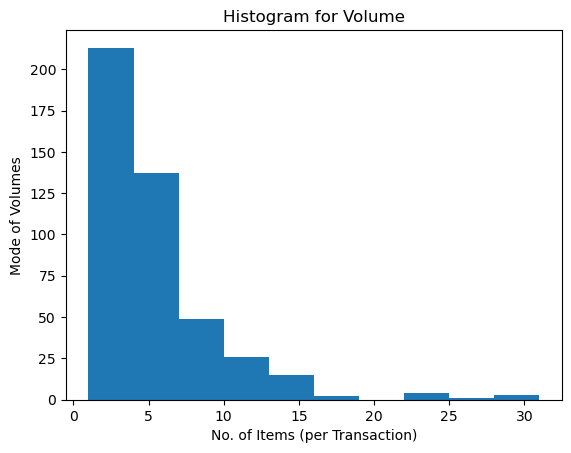

In [107]:
plt.hist(df['Volume'])
plt.xlabel('No. of Items (per Transaction)')
plt.ylabel('Mode of Volumes')
plt.title('Histogram for Volume')
plt.show()

##### Volume:
* Majority of the transaction involve smaller volumns, which indicates that the business deals with wide range of products.
* The histogram appears to be skewed to the right, with a majority of transactions having lower volumes.

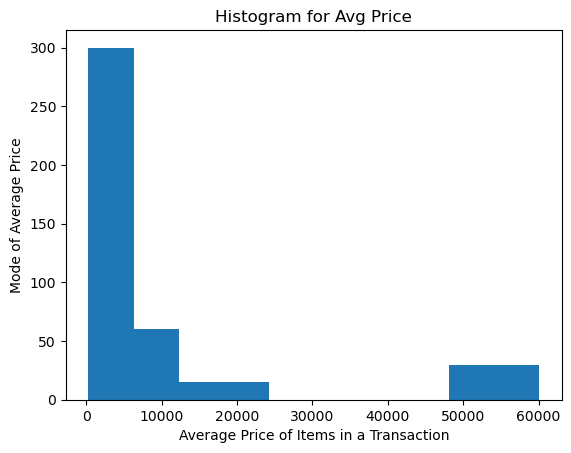

In [108]:
plt.hist(df['Avg Price'])
plt.xlabel('Average Price of Items in a Transaction')
plt.ylabel('Mode of Average Price')
plt.title('Histogram for Avg Price')
plt.show()

##### Average Price:
* Majority of the transactions involve items with lower average prices, which might indicate that the business deals with wide range of products, of which lower priced products are most frequently bought.
* The Histogram appears to be heavily skewed to the right, with a majority of transactions having lower average prices and fewer transactions with higher average prices.

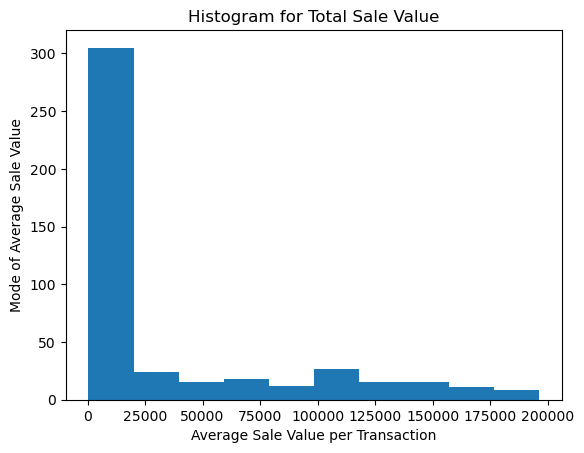

In [109]:
plt.hist(df['Total Sales Value'])
plt.xlabel('Average Sale Value per Transaction')
plt.ylabel('Mode of Average Sale Value')
plt.title('Histogram for Total Sale Value')
plt.show()

##### Total Sale Value:
* Majority of Transactions involve lower total sales value, which might indicate that the business deals majorly deals with lower priced products.
* The histogram appears to be skewed to the right, with a majority of transactions having lower total sales values and fewer transactions with higher total sales values.

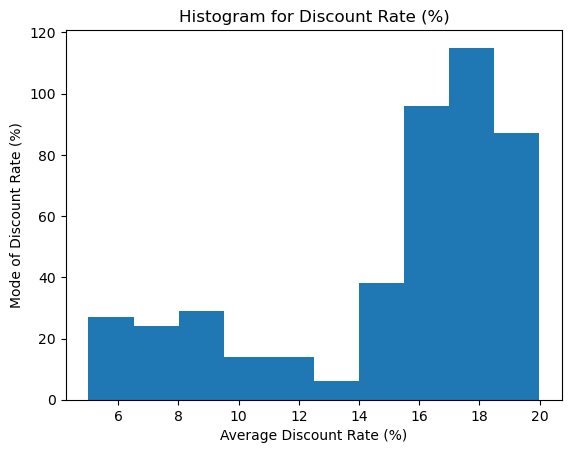

In [110]:
plt.hist(df['Discount Rate (%)'])
plt.xlabel('Average Discount Rate (%)')
plt.ylabel('Mode of Discount Rate (%)')
plt.title('Histogram for Discount Rate (%)')
plt.show()

##### Discount Rate (%):
* There is a diversity in the discount rates applied across transactions, with some transactions receiving lower discounts and others receiving higher discounts.
* The histogram appears to be skewed to the left, with majority of the transactions having higher discount rate while a significant number of transactions having lower discount rates.

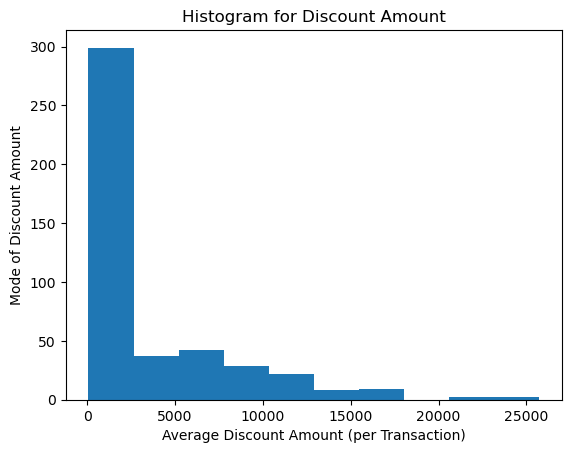

In [111]:
plt.hist(df['Discount Amount'])
plt.xlabel('Average Discount Amount (per Transaction)')
plt.ylabel('Mode of Discount Amount')
plt.title('Histogram for Discount Amount')
plt.show()

##### Discount Amount:
* Majority of transactions involve smaller discount amounts, which might indicate that the business applies discounts conservatively and customers typically receive smaller discounts even after having higher discount rates.
* The histogram appears to be skewed to the right, with majority of transactions having lower discount amounts and fewer transactions with higher discount amounts.

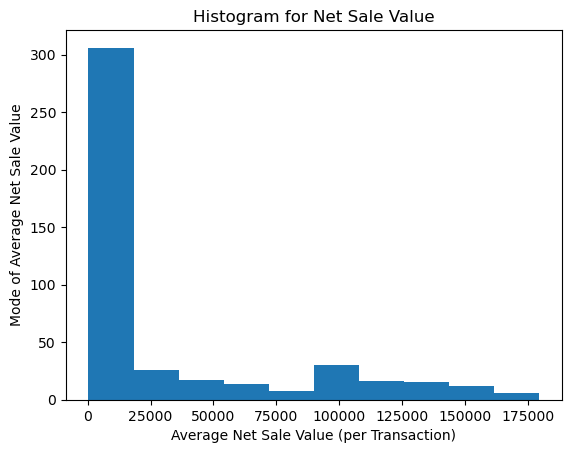

In [112]:
plt.hist(df['Net Sales Value'])
plt.xlabel('Average Net Sale Value (per Transaction)')
plt.ylabel('Mode of Average Net Sale Value')
plt.title('Histogram for Net Sale Value')
plt.show()

##### Net Sale Value:
* Majority of Transactions result in lower net sales values, which might indicate that the business deals with a mix of products with varying profitability.
* The histogram appears to be heavily skewed to the right, this suggests that most transactions result in lower net sales values, while fewer transactions result in higher net sales values.

In [113]:
import seaborn as sns

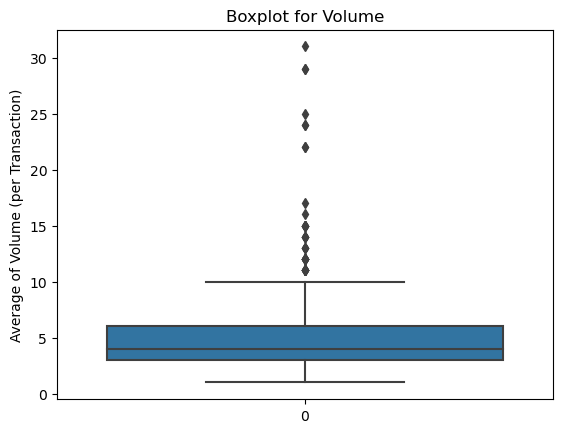

Interquartile Range (IQR): 3.0


In [114]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Volume'])
plt.ylabel('Average of Volume (per Transaction)')
plt.title('Boxplot for Volume')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Volume'].quantile(0.25)
q3 = df['Volume'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

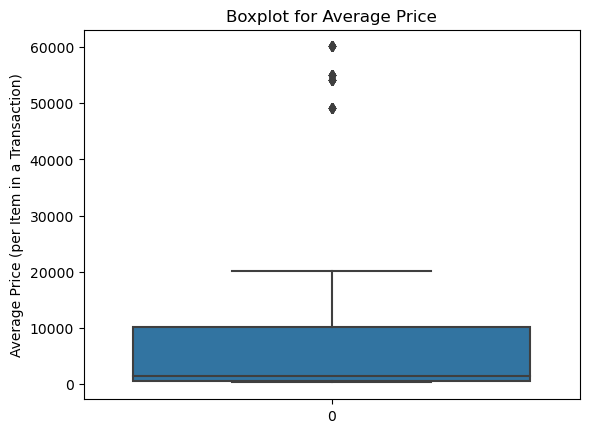

Interquartile Range (IQR): 9635.0


In [115]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Avg Price'])
plt.ylabel('Average Price (per Item in a Transaction)')
plt.title('Boxplot for Average Price')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Avg Price'].quantile(0.25)
q3 = df['Avg Price'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

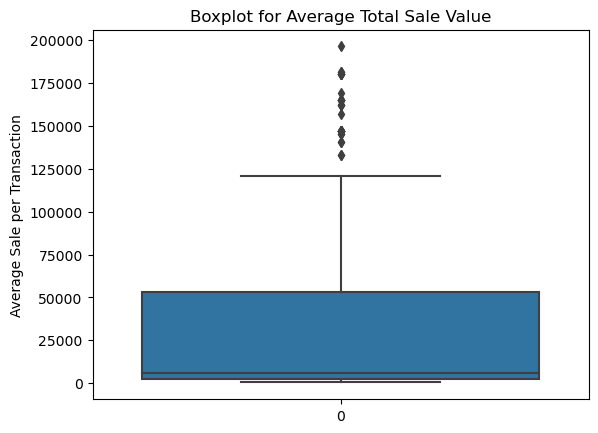

Interquartile Range (IQR): 50500.0


In [116]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Total Sales Value'])
plt.ylabel('Average Sale per Transaction')
plt.title('Boxplot for Average Total Sale Value')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Total Sales Value'].quantile(0.25)
q3 = df['Total Sales Value'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

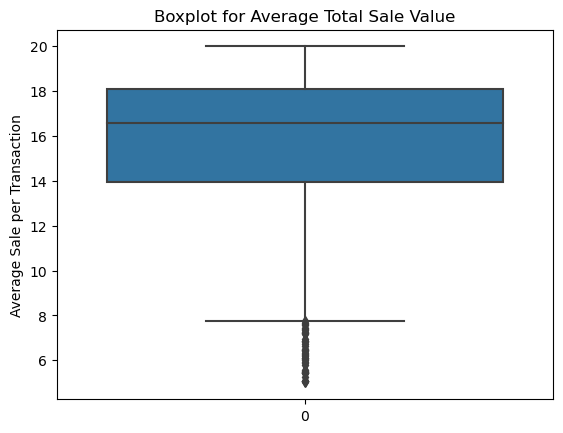

Interquartile Range (IQR): 4.149655934050962


In [117]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Discount Rate (%)'])
plt.ylabel('Average Sale per Transaction')
plt.title('Boxplot for Average Total Sale Value')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Discount Rate (%)'].quantile(0.25)
q3 = df['Discount Rate (%)'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

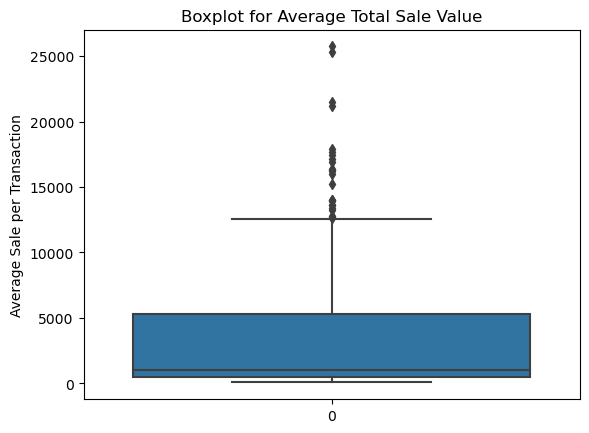

Interquartile Range (IQR): 4856.03612280112


In [118]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Discount Amount'])
plt.ylabel('Average Sale per Transaction')
plt.title('Boxplot for Average Total Sale Value')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Discount Amount'].quantile(0.25)
q3 = df['Discount Amount'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

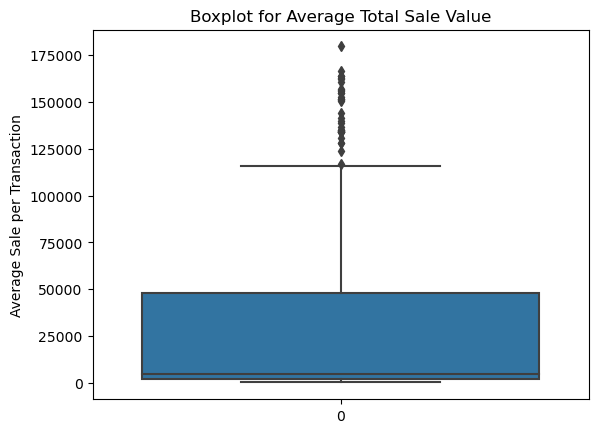

Interquartile Range (IQR): 45645.70420627015


In [119]:
#df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
sns.boxplot(df['Net Sales Value'])
plt.ylabel('Average Sale per Transaction')
plt.title('Boxplot for Average Total Sale Value')
plt.show()

# Calculate the interquartile range (IQR)
q1 = df['Net Sales Value'].quantile(0.25)
q3 = df['Net Sales Value'].quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)